<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [1]:
data <- read.csv("energy_efficiency_data.csv", sep = ",")
#data <- na.omit(data)
head(data)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [2]:
summary(data)

 Relative_Compactness  Surface_Area     Wall_Area       Roof_Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall_Height  Orientation    Glazing_Area    Glazing_Area_Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

In [3]:
#data_111 <- read.csv(file = file.choose(), header = TRUE, sep = ",")

#2

In [4]:
#деление на тестовую и обучающую выборку
index <- sample(1:nrow(data), nrow(data) * 0.8) 
test <- data[-c(index), ]
train <- data[index, ]

#3

In [5]:
#где выходом является у1 = sum(по всем столбцам, кроме Cooling_Load)
#lm_y1 <- lm(formula = Heating_Load ~ Relative_Compactness + Surface_Area 
            #+ Wall_Area + Roof_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train)
lm_y1 <- lm(formula = Heating_Load ~.-Cooling_Load, data = train)
summary(lm_y1)


Call:
lm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-9.581 -1.318 -0.052  1.358  7.849 

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                87.54102   20.58650   4.252 2.45e-05 ***
Relative_Compactness      -66.12259   11.12891  -5.942 4.76e-09 ***
Surface_Area               -0.09083    0.01845  -4.924 1.10e-06 ***
Wall_Area                   0.06276    0.00721   8.704  < 2e-16 ***
Roof_Area                        NA         NA      NA       NA    
Overall_Height              4.05037    0.37056  10.930  < 2e-16 ***
Orientation                -0.09300    0.10361  -0.898  0.36978    
Glazing_Area               20.09900    0.88892  22.610  < 2e-16 ***
Glazing_Area_Distribution   0.21828    0.07775   2.808  0.00515 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.886 on 606 degrees

In [6]:
glm_y1 <- glm(Heating_Load ~.-Cooling_Load, data = train)
summary(glm_y1)


Call:
glm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.581  -1.318  -0.052   1.358   7.849  

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                87.54102   20.58650   4.252 2.45e-05 ***
Relative_Compactness      -66.12259   11.12891  -5.942 4.76e-09 ***
Surface_Area               -0.09083    0.01845  -4.924 1.10e-06 ***
Wall_Area                   0.06276    0.00721   8.704  < 2e-16 ***
Roof_Area                        NA         NA      NA       NA    
Overall_Height              4.05037    0.37056  10.930  < 2e-16 ***
Orientation                -0.09300    0.10361  -0.898  0.36978    
Glazing_Area               20.09900    0.88892  22.610  < 2e-16 ***
Glazing_Area_Distribution   0.21828    0.07775   2.808  0.00515 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter fo

In [7]:
func_nlm <- function(a, b){
  a[1]*b[1]+a[2]*b[2]+a[3]*b[3]+a[4]*b[4]+a[5]*b[5]+a[6]*b[6]+a[7]*b[7]+a[8]*b[8]
}
fun1 <- function(a){
  sum((func_nlm(a, train[, 1:8]) - (train$Heating_Load))^2)
}

nlm_y1 <- nlm(fun1, p = c(0,0,0,0,0,0,0,0))$estimate
summary(nlm_y1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.554  -2.548   2.724   3.243  12.409  20.306 

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     38
	error: 169929.00192
	time: 0.02 secs



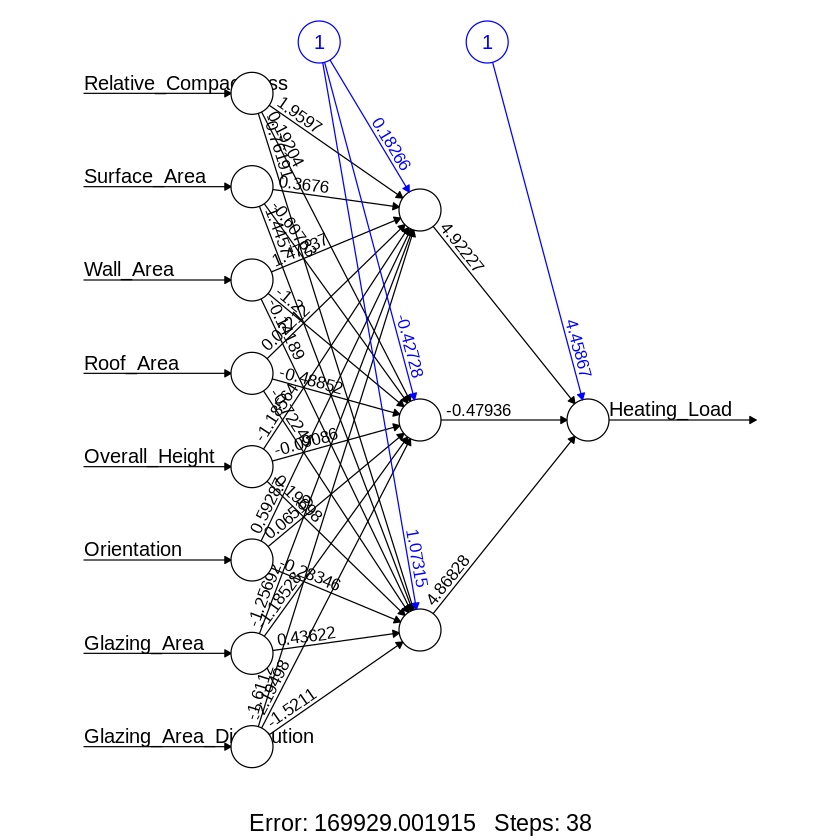

In [8]:
#install.packages("neuralnet")
library(neuralnet)

neuralnet_y1 <- neuralnet(Heating_Load ~.-Cooling_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y1, rep = 1)

#-------------------------------------------------------------------------------------------------------------------------

In [9]:
#где выходом является у2 = sum(по всем столбцам, кроме Heating_Load)
lm_y2 <- lm(formula = Cooling_Load ~.-Heating_Load, data = train)
summary(lm_y2)


Call:
lm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6094 -1.5707 -0.3001  1.3447 11.2141 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                99.764692  22.750154   4.385 1.37e-05 ***
Relative_Compactness      -72.505298  12.298566  -5.895 6.21e-09 ***
Surface_Area               -0.089576   0.020386  -4.394 1.31e-05 ***
Wall_Area                   0.042763   0.007968   5.367 1.14e-07 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.361184   0.409507  10.650  < 2e-16 ***
Orientation                 0.044029   0.114499   0.385    0.701    
Glazing_Area               15.184484   0.982350  15.457  < 2e-16 ***
Glazing_Area_Distribution   0.059038   0.085917   0.687    0.492    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [10]:
glm_y2 <- glm(Cooling_Load ~.-Heating_Load, data = train)
summary(glm_y2)


Call:
glm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.6094  -1.5707  -0.3001   1.3447  11.2141  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                99.764692  22.750154   4.385 1.37e-05 ***
Relative_Compactness      -72.505298  12.298566  -5.895 6.21e-09 ***
Surface_Area               -0.089576   0.020386  -4.394 1.31e-05 ***
Wall_Area                   0.042763   0.007968   5.367 1.14e-07 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.361184   0.409507  10.650  < 2e-16 ***
Orientation                 0.044029   0.114499   0.385    0.701    
Glazing_Area               15.184484   0.982350  15.457  < 2e-16 ***
Glazing_Area_Distribution   0.059038   0.085917   0.687    0.492    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [11]:
fun2 <- function(a){
  sum((func_nlm(a, train[, 1:8]) - (train$Cooling_Load))^2)
}
nlm_y2 <- nlm(fun2, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))$estimate
summary(nlm_y2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.434  -2.515   2.882   2.775  11.514  20.385 

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     36
	error: 198865.90849
	time: 0.01 secs



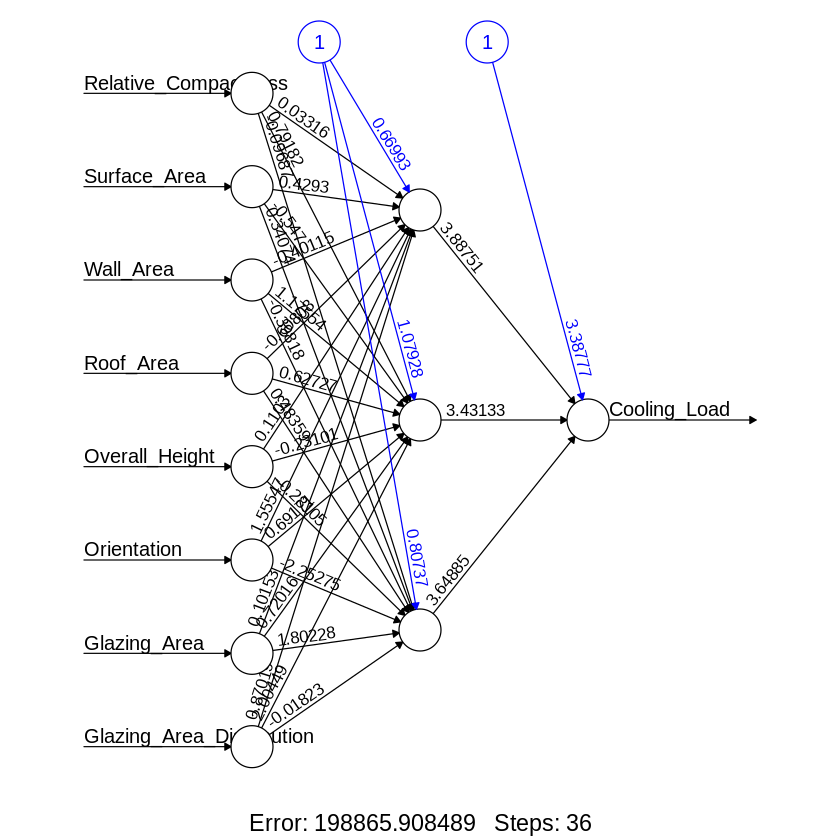

In [12]:
neuralnet_y2 <- neuralnet(Cooling_Load ~.-Heating_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y2, rep = 1)

#4

In [13]:
#линейная
pred_lm_y1 <- predict(lm_y1, test)
pred_lm_y2 <- predict(lm_y2, test)
#логистическая
pred_glm_y1 <- predict(glm_y1, test)
pred_glm_y2 <- predict(glm_y2, test)
#полиномиальная
pred_nlm_y1 <- func_nlm(nlm_y1, test[, 1:8])
pred_nlm_y2 <- func_nlm(nlm_y2, test[, 1:8])
#нейросеть
pred_nn_y1 <- compute(neuralnet_y1, test[, 1:8])
pred_nn_y2 <- compute(neuralnet_y2, test[, 1:8])

Warning message in predict.lm(lm_y1, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(lm_y2, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [14]:
accuracy <- function(pred, y){
  return (1 - norm(as.matrix(pred)-as.matrix(y)) / norm(as.matrix(y)))
}
acc_lm_y1 <- accuracy(pred_lm_y1, test$Heating_Load)
acc_glm_y1 <- accuracy(pred_glm_y1, test$Heating_Load)
acc_nn_y1 <- pred_nn_y1$net.result
acc_nlm_y1 <- accuracy(pred_nlm_y1, test$Heating_Load)

acc_lm_y2 <- accuracy(pred_lm_y2, test$Cooling_Load)
acc_glm_y2 <- accuracy(pred_glm_y2, test$Cooling_Load)
acc_nn_y2 <- pred_nn_y1$net.result
acc_nlm_y2 <- accuracy(pred_nlm_y2, test$Cooling_Load)

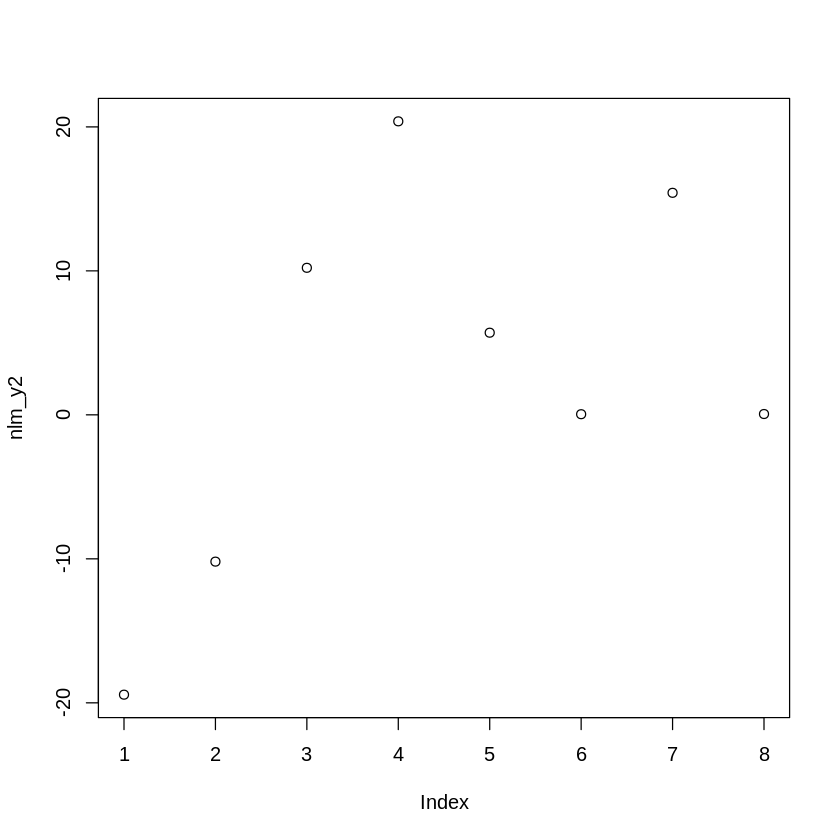

In [15]:
plot(nlm_y2)

#5

In [16]:
r1 = c(acc_lm_y1, acc_glm_y1, acc_nlm_y1, acc_nn_y1[1])
r2 = c(acc_lm_y2, acc_glm_y2, acc_nlm_y2, acc_nn_y2[1])

table_0 <- matrix(c(r1,r2), ncol=4, byrow=TRUE)
colnames(table_0) <- c('lm', 'glm', 'nlm', 'nn')
rownames(table_0) <- c('y1', 'y2')
rezult <- as.table(table_0)
print(rezult)

          lm       glm       nlm        nn
y1 0.9032634 0.9032634 0.9004725 0.9999994
y2 0.9067156 0.9067156 0.9052916 0.9999994


#6

In [17]:
variable_nn <- function(a, b, c){
  w <- c - as.matrix(test[, 1:8]) %*% a[2:9] - a[1]
  return (norm(w, b))
}
nlm(variable_nn, 1:9, b = '1', c = test$Heating_Load)

$minimum
[1] 329.1528

$estimate
[1] -2.12762964 -7.34201797 -1.83743513  1.87132156  3.63498438  4.23461675
[7]  0.03718161 16.22771631  0.09842922

$gradient
[1]    2.0000    2.5600 2512.8925 1215.2366  298.8656   24.5000    9.0000
[8]    0.6500   -1.0000

$code
[1] 3

$iterations
[1] 26

In [18]:
nlm(variable_nn, 1:9, b = '1', c = test$Cooling_Load)

$minimum
[1] 341.4641

$estimate
[1] 114.57483078 -66.89652784  -1.50536342   1.45974633   2.77972131
[6]   2.33434987   0.15384584  12.35250506  -0.01409592

$gradient
[1]   0.09380411   0.01065990 162.81252312 356.19238711 133.42795923
[6]   1.29326744  -1.00000000   0.25000000   1.00000000

$code
[1] 3

$iterations
[1] 36

In [19]:
nlm(variable_nn, 1:9, b = 'I', c = test$Heating_Load)

$minimum
[1] 7.488549

$estimate
[1]  -8.14126566 -15.84409464  -1.83456359   1.89545593   3.63638093
[6]   4.43282018   0.03051902  24.72623068   0.38172118

$gradient
[1]  0.11409952  0.07362844 11.92535774 36.43578701  0.25545028  0.20955385
[7]  0.92891454  0.11256798  2.42891454

$code
[1] 3

$iterations
[1] 53

In [20]:
nlm(variable_nn, 1:9, b = 'I', c = test$Cooling_Load)

$minimum
[1] 45.60767

$estimate
[1]   1.4133870 -64.7216598  -0.9904347   0.8378633   2.5101819   6.2686564
[7]  -1.7865964   2.7050177   1.8687834

$gradient
[1]   1.00   0.74 686.00 245.00 220.50   3.50   3.00   0.10   5.00

$code
[1] 2

$iterations
[1] 23

In [25]:
#install.packages("quantreg")
#install.packages("SparseM")
library(quantreg)
library(SparseM)
#mape_nn_y1 <- rq(formula = Heating_Load ~.-Cooling_Load, data = train, tau = 0.2)
mape_nn_y1 <- rq(y = train$Heating_Load, data = train[, 1:8], tau = 0.2, )
pred_mape_nn_y1 <- predict(mape_nn_y1, test)
result_mape_nn_y1 <- 1.0 / length(test$Heating_Load) * sum(abs((test$Heating_Load - pred_mape_nn_y1) / (test$Heating_Load)))

#mape_nn_y2 <- rq(formula = Cooling_Load ~.- Heating_Load, data = train, tau = 0.2)
#pred_mape_nn_y2 <- predict(mape_nn_y2, test)
#result_mape_nn_y2 <- 1.0 / length(test$Cooling_Load) * sum(abs((test$Cooling_Load - pred_mape_nn_y2) / (test$Cooling_Load)))

print("mape y1 = ", result_mape_nn_y1)
print("mape y2 = ", result_mape_nn_y2)

ERROR: ignored